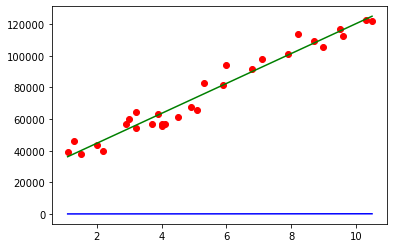

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def poly_dim(X, power = 1):
    Phi = np.array([[x ** p for p in range(power + 1)] for x in X])
    return Phi

def MSE(X, theta, Y):
    return np.sum(Y - np.dot(X, theta)) ** 2 / len(X)

def GD(X, Y, L, epochs):
    theta = np.zeros(X.shape[1])
    n = len(X)
    for i in range(epochs):
        Y_pred = np.dot(X, theta)
        Y_delta = Y - Y_pred
        gradient = 2 * np.dot(Y_delta, X) / n
        theta += L * gradient
    return theta

dataset = pd.read_csv('yoe_sal.csv')
X = np.array(dataset['YearsExperience'])
Y = np.array(dataset['Salary'])
Phi = poly_dim(X)
theta = GD(Phi, Y, 10 ** -10, 10 ** 5)

plt.scatter(X, Y, color = "red")
plt.plot(X, np.dot(Phi, theta), color = "blue")
m_np, b_np = np.polyfit(X, Y, 1)
plt.plot(X, m_np * X + b_np, color = "green")
plt.show()